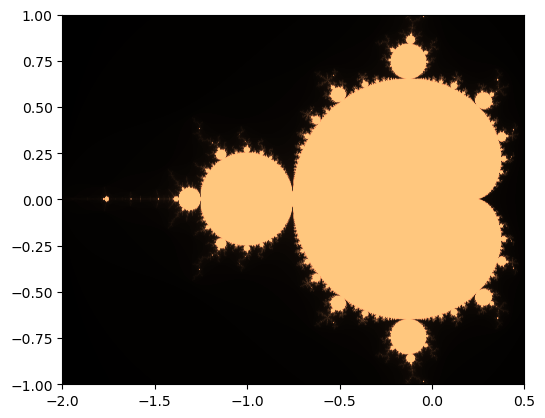

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange

@jit(nopython=True)
def mandelbrot(z, max_iter):
    c = z
    for i in range(max_iter):
        if abs(z) > 2:
            return i
        z = z*z + c
    return max_iter


@jit(nopython=True, parallel=True)
def mandelbrot_parallel(real_range, imag_range, max_iter):
    size = len(real_range)
    counts = np.zeros((size, size), dtype=np.int32)
    for i in prange(size):
        for j in prange(size):
            z = complex(real_range[j], imag_range[i])
            counts[i, j] = mandelbrot(z, max_iter)
    return counts

size = 30_000
max_iter = 250

real_range = np.linspace(-2, 0.5, size)
imag_range = np.linspace(-1, 1, size)

counts = mandelbrot_parallel(real_range, imag_range, max_iter)

# Plot the Mandelbrot set
plt.imshow(counts, cmap='hot', extent=[-2, 0.5, -1, 1])
plt.savefig(f'mandelbrot_{max_iter}_{size}.png', dpi=size/5)
# plt.show()

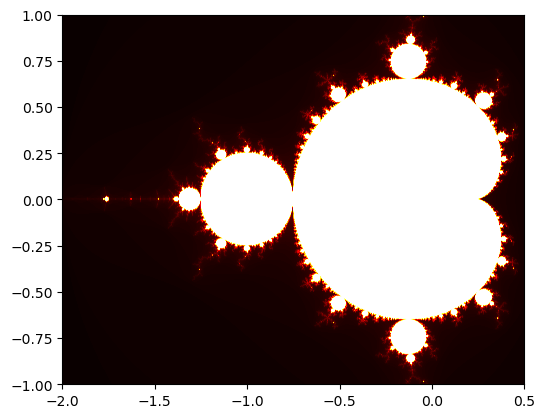

In [3]:
plt.imshow(counts, cmap='hot', extent=[-2, 0.5, -1, 1])
plt.savefig(f'mandelbrot_{max_iter}_{size}_hot.png', dpi=size/5)